Let's begin with importing our needed libraries.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib
import random
%matplotlib inline
plt.style.use('fivethirtyeight')

Next, let's create a dictionary.

In [2]:
data = {'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ], 'y':[.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

Next, let's turn it into a dataframe.

In [3]:
df = pd.DataFrame(data)

Let's create two new series and make them into a dataframe as well.

In [4]:
x_series = df['x'] + 10
y_series = df['y'] + 3

new_data = pd.DataFrame(list(zip(x_series, y_series)), columns = ['x','y'])

Now, let's combine the two dataframes.

In [5]:
new_df = pd.concat([df, new_data], ignore_index=True)

Let's continue by plotting the new dataframe.

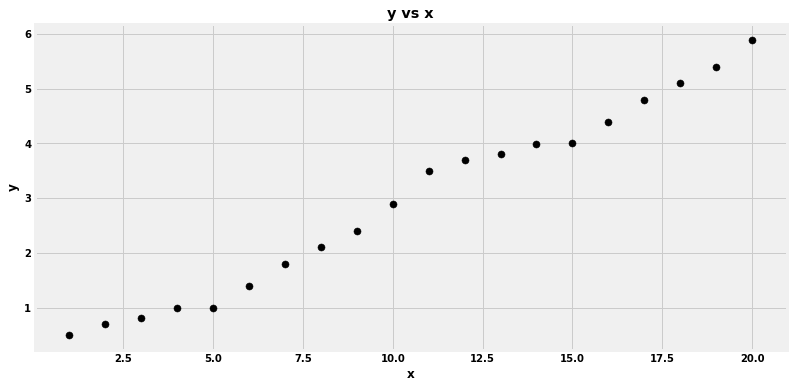

In [6]:
new_df.plot(kind='scatter', x='x', y='y', color='black', figsize=(12,6), title='y vs x', s=50);

Using statsmodels, we'll fit an OLS regression to our data and print out the summary.

In [7]:
X = new_df.x
Y = new_df.y

X = sm.add_constant(X)

model = sm.OLS(Y, X)

results = model.fit()

results.summary()

C:\Users\Daniel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           3.76e-18
Time:                        17:15:42   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0857      0.097     -0.880      0.391      -0.290       0.119
x              0.2900      0.008     35.655      0.000       0.273       0.307
==============================================================================
Omnibus:                        0.496   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.601
Skew:                           0.249   Prob(JB):                        0.740
Kurtosis:                       2.312   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
print('R-Squared:', results.rsquared)

R-Squared: 0.9860390205423032


In [9]:
print('P-Value of X:', results.t_test([0, 1]).pvalue)

P-Value of X: 3.7606594444670874e-18


In [10]:
print('Y-Intercept:', results.params[0])

Y-Intercept: -0.08568421052631714


In [11]:
print('Equation for fitted line: Y = {} X + {}'.format(round(results.params[1], 3), round(results.params[0], 3)))

Equation for fitted line: Y = 0.29 X + -0.086


We can predict values using the predict functionality in statsmodels.

In [12]:
# Let's predict values for x = 20 and x = 40 #

xlist = [20, 40]

Xlist = sm.add_constant(xlist)

results.predict(Xlist)

array([ 5.71371429, 11.51311278])

We can check out the sum of squared errors (SSE) by using the predictions for every X and the true Y values.

In [13]:
y_pred = results.predict(X)

print('SSE:', sum(np.square(y_pred - new_df['y'])))

SSE: 0.7916793984962407


Let's visualize our predictions by plotting them for every X.

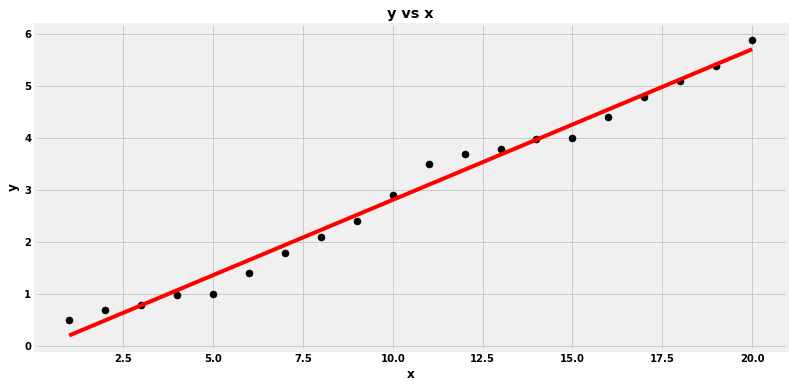

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(new_df['x'], new_df['y'], color = 'black', s=50)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(new_df['x'], y_pred, color='r');

We can get closer predictions if we fit our data with a polynomial. Let's try using a five degree polynomial.

In [15]:
poly = PolynomialFeatures(5)

In [16]:
poly_feats = poly.fit_transform(new_df[['x']])

poly_X = pd.DataFrame(poly_feats)

In [17]:
poly_df = pd.merge(new_df[['y']], poly_X, right_index=True, left_index=True)

Using statsmodels as before, we'll fit this new model and save it as poly_results.

In [18]:
X = poly_df[[0, 1, 2, 3, 4, 5]]
X = sm.add_constant(X)
Y = poly_df['y']

lm = sm.OLS(Y, X)

poly_results = lm.fit()

poly_results.summary()

C:\Users\Daniel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     572.4
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           1.15e-15
Time:                        17:15:43   Log-Likelihood:                 14.451
No. Observations:                  20   AIC:                            -16.90
Df Residuals:                      14   BIC:                            -10.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5702      0.312      1.827      0.089      -0.099       1.240
1             -0.0104      0.274     -0.038      0.970      -0.598       0.577
2              0.0099      0.076      0.130      0.898      -0.153       0.173
3              0.0054      0.009      0.600      0.558      -0.014       0.024
4             -0.0005      0.000     -1.136      0.275      -0.002       0.000
5           1.347e-05    8.8e-06      1.531      0.148    -5.4e-06    3.23e-05
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.027
Skew:                           0.004   Prob(JB):                        0.987
Kurtosis:                       3.179   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's check out our polynomial model's predictions and calculate the SSE.

In [19]:
poly_y_pred = poly_results.predict(X)

print('SSE:', sum(np.square(poly_y_pred - poly_df['y'])))

SSE: 0.2760304507274931


Let's visualize our predictions for the polynomial fit.

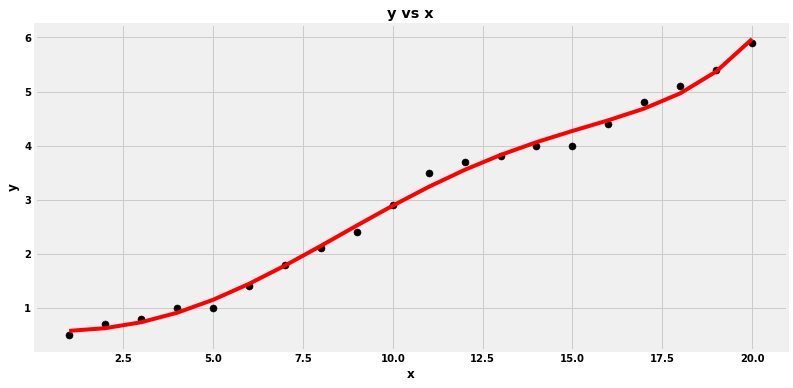

In [20]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(new_df['x'], new_df['y'], color = 'black', s=50)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(new_df['x'], poly_y_pred, color='r');

We can see from the previous cells that the error significantly decreased when introducing a polynomial model. Let's create a loop that iterates over the following alpha values: [0, 0.001, 0.01, 0.25, 0.5, 0.75, 1, 10]. However, for each iteration we'll fit a regularized regression, set the L1_wt parameter to 0 (ridge fit), plot the predictions like before to help visualize our model, print the values for alpha, SSE, and the mean absolute value of the coefficient of the model to compare.

------------------------------------------------------------
Alpha: 0
SSE: 0.27603045072749305
Mean Absolute Value (coefficient): 0.09940427313587707


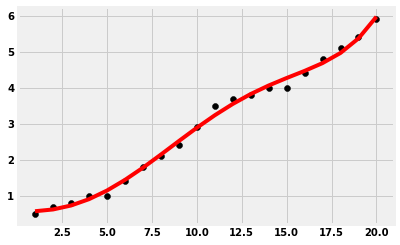

------------------------------------------------------------
Alpha: 0.001
SSE: 0.27651740078942305
Mean Absolute Value (coefficient): 0.09306068643497746


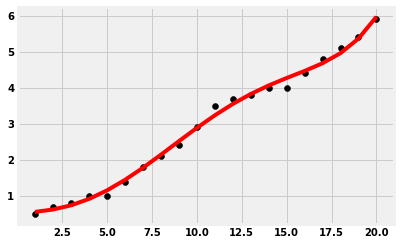

------------------------------------------------------------
Alpha: 0.01
SSE: 0.28603651038196953
Mean Absolute Value (coefficient): 0.09132895867888213


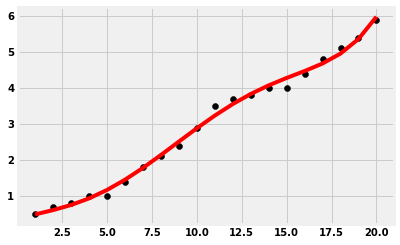

------------------------------------------------------------
Alpha: 0.25
SSE: 0.45975256505855694
Mean Absolute Value (coefficient): 0.0409182589215583


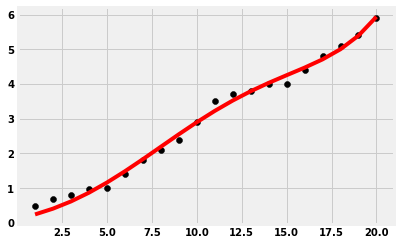

------------------------------------------------------------
Alpha: 0.5
SSE: 0.5559838183905951
Mean Absolute Value (coefficient): 0.030833522731147252


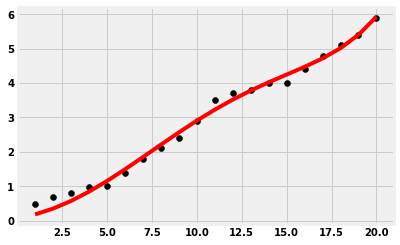

------------------------------------------------------------
Alpha: 0.75
SSE: 0.6085642455267063
Mean Absolute Value (coefficient): 0.02622637938359619


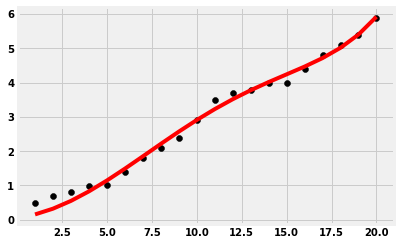

------------------------------------------------------------
Alpha: 1
SSE: 0.6421710410176367
Mean Absolute Value (coefficient): 0.02358791087603594


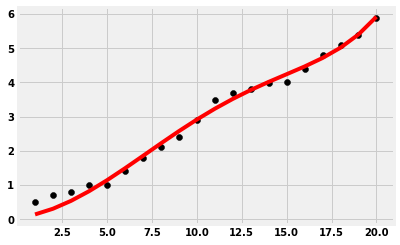

------------------------------------------------------------
Alpha: 10
SSE: 0.9630610519147634
Mean Absolute Value (coefficient): 0.010267976968739887


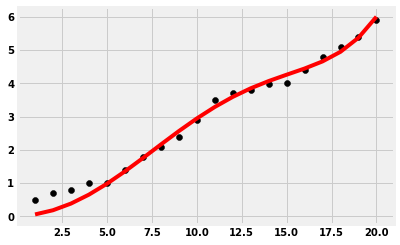

In [21]:
alpha = [0, 0.001, 0.01, 0.25, 0.5, 0.75, 1, 10]

for i in alpha:
    print('---'*20)
    
    results = lm.fit_regularized(alpha=i, L1_wt=0)
    
    y_pred = results.predict(X)
    
    print('Alpha:', i)
    
    sse = sum(np.square(y_pred - poly_df['y']))
    
    print('SSE:', sse) 
    
    print('Mean Absolute Value (coefficient):', np.mean(abs(results.params)))
    
    fig = plt.figure(figsize=(6,4))
    ax = plt.gca()
    ax.scatter(new_df['x'], Y, c='k')
    ax.plot(new_df['x'], y_pred, color='r')
    plt.show()

We can observe the following:

- As the alpha values increase, so do our SSE values.

- As the alpha values increase, the mean absolute value of the coefficients move toward 0.

Ideally, we want to find an optimal trade-off between bias and variance.